<a href="https://colab.research.google.com/github/fedenemi/practice_university_of_michigan/blob/main/asignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from scipy.sparse import csr_matrix, hstack
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re

In [ ]:
spam_data = pd.read_csv('spam.csv')

spam_data['target'] = np.where(spam_data['target']=='spam',1,0)
spam_data.head(10)

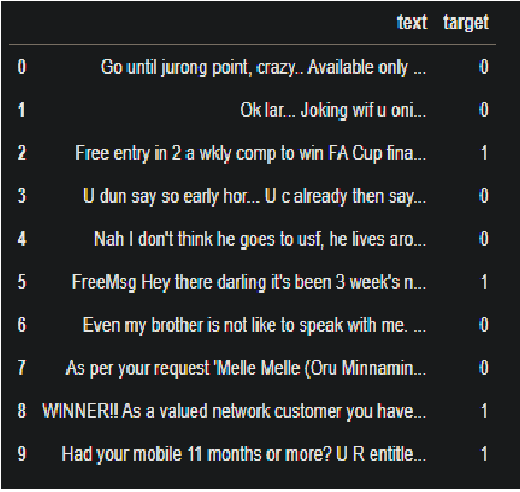

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], 
                                                    spam_data['target'], 
                                                    random_state=0)

In [ ]:
#What percentage of the documents in spam_data are spam?
(len(spam_data[spam_data.target==1])/len(spam_data.target))*100
#output: 13.406317300789663

In [ ]:
# What is the longest token in the vocabulary?
def answer_two():
    cv=CountVectorizer()
    vect=cv.fit_transform(X_train)
    features=cv.get_feature_names()
    df=pd.DataFrame(np.asarray(vect.sum(axis=0)))
    df=df.stack()
    df.index=features
    df=df.reset_index()
    df.columns=["ind","fr"]
    df["len"]=df.ind.apply(lambda x: len(x))
    return(df.sort_values(by="fr",ascending=False).head(1),df.sort_values(by="len",ascending=False).where(df["fr"]>1).head(5))

answer_two()

In [ ]:
def answer_three():
    cv=CountVectorizer()
    vect=cv.fit(X_test)
    X_train_vect=cv.transform(X_train)
    model=MultinomialNB(alpha=0.1).fit(X_train_vect,y_train)
    preds=model.predict(vect.transform(X_test))
    
    
    
    
    return roc_auc_score(y_test, preds)
answer_three()
#output: 0.98145680186068629

In [ ]:
def answer_four():
    vect=TfidfVectorizer().fit(X_train)
    vect_t=vect.transform(X_train)
    ser=pd.DataFrame(np.asarray(vect_t.sum(axis=0)))
    ser=ser.stack()
    ser.index=vect.get_feature_names()
    ser=ser.sort_values()
    ser_largest=ser.iloc[-11:-1]
    ser_smallest=ser.iloc[:10]



    
    
    return (ser_smallest.head(2),ser_largest.head(2))
answer_four()

#output:

# (aaniye          0.074475
#  exterminator    0.074475
#  dtype: float64, ok      70.873379
#  call    74.859833
#  dtype: float64)


In [ ]:
def answer_five():
    vect=TfidfVectorizer(min_df=3).fit(X_train)
    X_train_vect=vect.transform(X_train)
    model=MultinomialNB(alpha=0.1).fit(X_train_vect, y_train)
    preds=model.predict(vect.transform(X_test))
    
    return roc_auc_score(y_test, preds)
answer_five()
#output: 0.94162436548223349

In [ ]:
# What is the average length of documents (number of characters) for not spam and spam documents?
def answer_six():
    spam_len=spam_data[spam_data["target"]==1]
    not_spam_len=spam_data[spam_data["target"]==0]
    spam_len.text=spam_len.text.apply(lambda x: len(x))
    not_spam_len.text=not_spam_len.text.apply(lambda x: len(x))
    
    
    
    
    
    return (not_spam_len.text.mean(),spam_len.text.mean())

answer_six()
#output: (71.023626943005183, 138.8661311914324)

In [ ]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [ ]:
def answer_seven():
    
    
    
    vect=TfidfVectorizer(min_df=5)
    X_train_vect=vect.fit_transform(X_train)
    X_test_vect=vect.transform(X_test)
    add_feature(X_train_vect, X_train.str.len())
    add_feature(X_test_vect,X_test.str.len())
    model=SVC( C=10000).fit(X_train_vect,y_train)
    preds=model.predict(vect.transform(X_test))
    
    
    
    return roc_auc_score(y_test, preds)
answer_seven()
#output: 0.94971605860482489

In [ ]:
# What is the average number of digits per document for not spam and spam documents?
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

def answer_eight():
    spam=spam_data[spam_data['target']==1].text.apply(lambda x: find_number(x)).str.strip().str.len().mean()
    not_spam=spam_data[spam_data['target']==0].text.apply(lambda x: find_number(x)).str.strip().str.len().mean()
    
    
    return  (not_spam,spam)

answer_eight()
# output:(0.39917098445595856, 19.261044176706829)

In [ ]:
def dig(x):
    nums=re.findall(r"\d+",x)
    return nums
    

def answer_nine():
    vect=TfidfVectorizer(min_df=5,ngram_range=(1,3)).fit(X_train)
    X_train_vect=vect.transform(X_train)
    X_test_vect=vect.transform(X_test)
    add_feature(X_train_vect,X_train.str.len())
    add_feature(X_train_vect,X_train.apply(lambda x: dig(x)).str.len())
    add_feature(X_test_vect,X_test.apply(lambda x: dig(x)).str.len())
    add_feature(X_test_vect,X_test.str.len())
    
    model=LogisticRegression(C=100).fit(X_train_vect,y_train)
    preds=model.predict(X_test_vect)
        
    
    return roc_auc_score(y_test, preds)
answer_nine()

#output:0.95601667147683478

In [ ]:
#What is the average number of non-word characters (anything other than a letter, digit or underscore) per document for not spam and spam documents?
def find_non_w(x):
    return re.findall(r"\W",x)

def answer_ten():
    non_w_spam=spam_data[spam_data["target"]==1].text.apply(lambda x: find_non_w(x)).str.len().mean()
    non_w_non_spam=spam_data[spam_data["target"]==0].text.apply(lambda x: find_non_w(x)).str.len().mean()
    
    return (non_w_non_spam, non_w_spam)

answer_ten()
#output: (17.291813471502589, 29.041499330655956)

In [ ]:
def non_w(x):
    return re.findall(r"\W",x)

def dig(x):
    nums=re.findall(r"\d+",x)
    return nums

def answer_eleven():
    vect=CountVectorizer(min_df=5, ngram_range=(2,5), analyzer="char_wb").fit(X_train)
    X_train_vect=vect.transform(X_train)
    X_test_vect=vect.transform(X_test)
    add_feature(X_train_vect,X_train.str.len())
    add_feature(X_train_vect,X_train.apply(lambda x: dig(x)).str.len())
    add_feature(X_train_vect,X_train.apply(lambda x: non_w(x)).str.len())
    add_feature(X_test_vect,X_test.str.len())
    add_feature(X_test_vect,X_test.apply(lambda x: dig(x)).str.len())
    add_feature(X_test_vect,X_test.apply(lambda x: non_w(x)).str.len())
    model=LogisticRegression(C=100).fit(X_train_vect, y_train)
    preds=model.predict(X_test_vect)
    score=roc_auc_score(y_test, preds)
    importance = model.coef_[0].argsort()
    features=np.array(vect.get_feature_names() +  ['length_of_doc', 'digit_count', 'non_word_char_count'])
    
    return (score, list(features[importance[:10]]),list(features[importance[-11:-1]]))

answer_eleven()
# output:
#(0.97420122913943263,
#  ['..', ':)', ' y', ' i', ' go', '? ', 'he', 'pe', ' m', 'so'],
#  ['mob', '6 ', '80', '0p', '15', '46', '00', '08', '50', ' 1'])